![png](../../../imagenes/logotipo-axity-ppt.png)

# Thompson Sampling

## Explicación del Ejemplo

En casi todos los sitios web se despliegan anuncios. Las compañías que desean promover sus productos eligen estos sitios como un medio de publicidad. El reto para las compañías es que, si tienen varias versiones de los anuncios, como pueden elegir la versión que tiene mas posibilidades de atraer clientes, es decir, el máximo número de clics en el anuncio.  

Veremos como aplicar el aprendizaje por reforzamiento, para predecir la tasa de clics (Click-Through-Rate o CTR) para los anuncios web. Utilizaremos el método Thompson Sampling, para encontrar la versión del anuncio, con mayores posibilidades de obtener el máximo número de clics, de los visitantes del sitio web, entre un conjunto de versiones disponibles.  

### Los datos
Se utilizará el conjunto de datos Ads CTR Optimization de Kaggle.  

Este conjunto de datos contiene las respuestas de 10,000 visitantes a 10 anuncios desplegados en una plataforma web. Estos 10 anuncios son versiones del mismo producto. Las respuestas representan las recompensas que los visitantes proporcionaron a los anuncios, es decir, si el visitante hizo clic en el anuncio, la recompensa es 1; si el visitante ignoró el anuncio, la recompensa es 0.  

Basándonos en estas recompensas, la tarea es identificar cuál de los anuncios tendrá el CTR más alto, para que pueda ser colocado en la plataforma web.

## Selección Aleatoria

Para validar la eficiencia del algoritmo a utilizar, generemos una selección aleatoria de los anuncios.  

In [1]:
# Importar las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importar el conjunto de datos
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
# Revisión del conjunto de datos
dataset.head()

Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0     1     0     0     0     1     0     0     0     1      0
1     0     0     0     0     0     0     0     0     1      0
2     0     0     0     0     0     0     0     0     0      0
3     0     1     0     0     0     0     0     1     0      0
4     0     0     0     0     0     0     0     0     0      0

In [4]:
# Implementar una Selección Aleatoria
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

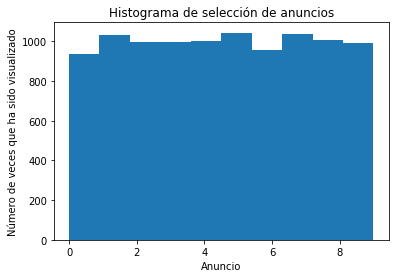

In [5]:
# Visualizar los resultados - Histograma
plt.hist(ads_selected)
plt.title('Histograma de selección de anuncios')
plt.xlabel('Anuncio')
plt.ylabel('Número de veces que ha sido visualizado')
plt.show()

## Usando Thompson Sampling

Ahora implementemos el algoritmo

In [6]:
# Algoritmo de Muestreo Thompson
import random
N = 10000
d = 10
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
ads_selected = []
total_reward = 0
for n in range(0, N):
    max_random = 0
    ad = 0
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1, number_of_rewards_0[i]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] = number_of_rewards_1[ad] + 1
    else:
        number_of_rewards_0[ad] = number_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [7]:
# Visualizar los resultados - Histograma
plt.hist(ads_selected)
plt.title("Histograma de anuncios")
plt.xlabel("ID del Anuncio")
plt.ylabel("Frecuencia de visualización del anuncio")
plt.show()

Como podemos observar, el algoritmo funciona de manera mucho más eficiente que una selección aleatoria, proporcionando el anuncio con mayores posibilidades de ser elegido.